In [1]:
import scanpy as sc
import schist as scs
import pandas as pd
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [116]:
adata = scs.io.read("Planaria_schist")

In [3]:
sc.set_figure_params(dpi=100)

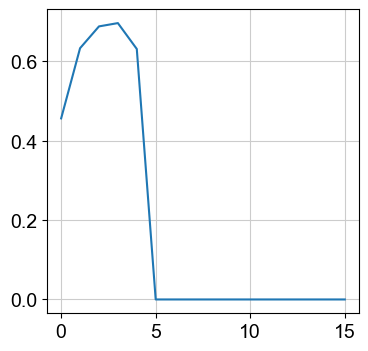

In [4]:
plot(adata.uns['schist']['stats']['modularity'])

In [7]:
adata.obs

,n_genes,n_counts,leiden,ppbm,nsbm_level_0,nsbm_level_1,nsbm_level_2,nsbm_level_3,nsbm_level_4,nsbm_level_5,nsbm_level_6,nsbm_level_7,nsbm_level_8,nsbm_level_9,nsbm_level_10,nsbm_level_11,nsbm_level_12,nsbm_level_13,nsbm_level_14,nsbm_level_15
plan1_GACTTTCTCTTC,1690,8059.0,0,34,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0
plan1_GTAAGGCGACAN,913,5490.0,0,34,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0
plan1_TGGCCCAGCTGC,2241,8188.0,0,34,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0
plan1_CTCCTGTAATTT,2488,7699.0,1,1,1,1,16,1,0,0,0,0,0,0,0,0,0,0,0,0
plan1_ATGACGCATAAT,2318,7709.0,2,2,2,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cutd3_TTTTCTATCTTT,210,285.0,27,40,114,48,17,2,1,0,0,0,0,0,0,0,0,0,0,0
cutd3_GCAGTTTTTGCG,666,1152.0,5,27,22,16,11,2,1,0,0,0,0,0,0,0,0,0,0,0
cutd3_CTGCGTTCATAC,213,288.0,17,23,122,30,6,6,2,0,0,0,0,0,0,0,0,0,0,0
cutd3_GATAGCCCCTCT,247,350.0,17,23,135,38,6,6,2,0,0,0,0,0,0,0,0,0,0,0


In [119]:
sc.tl.umap(adata)

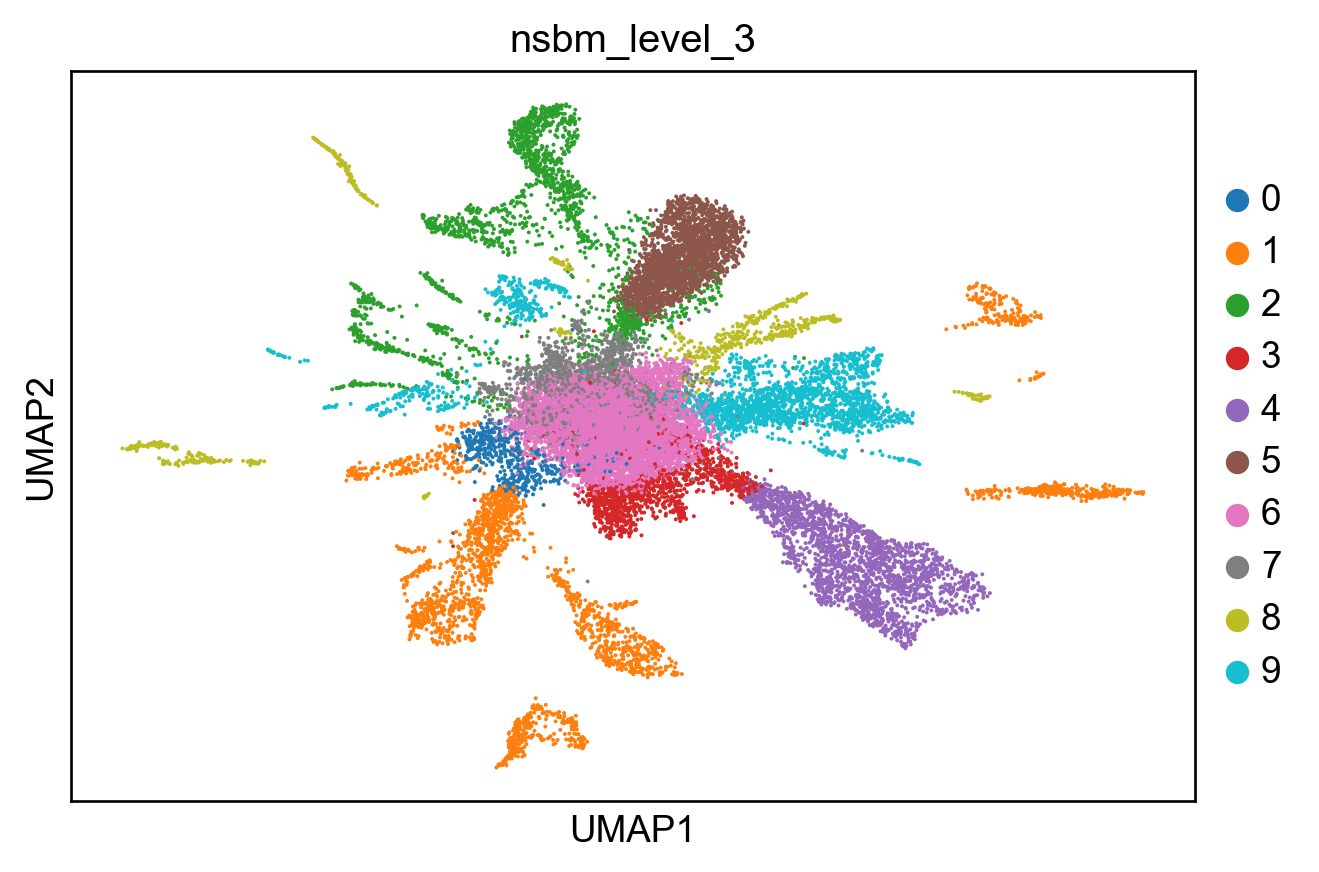

In [120]:
sc.pl.umap(adata, color='nsbm_level_3')

In [16]:
import scvelo as scv

In [117]:
marginals = pd.DataFrame(adata.obsm['CM_nsbm_level_0'], columns=adata.obs['nsbm_level_0'].cat.categories)

In [121]:
X_emb = pd.DataFrame(adata.obsm['X_umap'], 
                     index=adata.obs_names, 
                     columns=['X', 'Y'])

In [122]:
X_emb = pd.concat([X_emb, adata.obs['nsbm_level_0']], axis=1)

In [123]:
X_groups = X_emb.groupby('nsbm_level_0').agg(mean).values

In [124]:
rank_marginals = marginals.rank(axis=1, ascending=False, method='first')

In [125]:
seconds = np.where(rank_marginals.values == 2)
firsts = np.where(rank_marginals.values == 1)

In [131]:
V_emb = X_groups[seconds[1]] - adata.obsm['X_umap']

In [132]:
prob_diff = marginals.values[firsts] - marginals.values[seconds]

In [138]:
adata.obsm['marginal_umap'] = V_emb / ( 1-prob_diff[:, None])

In [134]:
scv.set_figure_params(dpi=120)

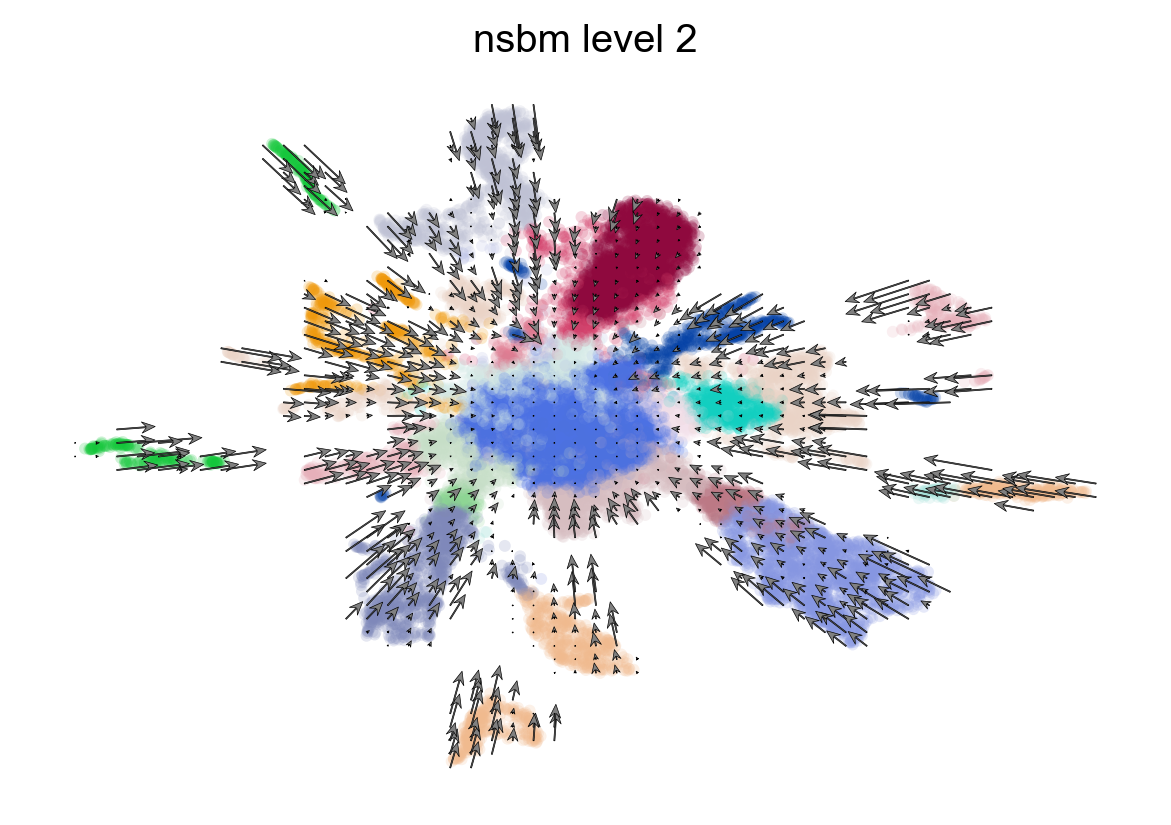

In [139]:
scv.pl.velocity_embedding_grid(adata, color='nsbm_level_2', 
                               vkey='marginal', basis='umap',
                              arrow_length=3, arrow_size=2)

In [140]:
adata.obsm['CM_nsbm_level_1'].max()

1.0000000000000002

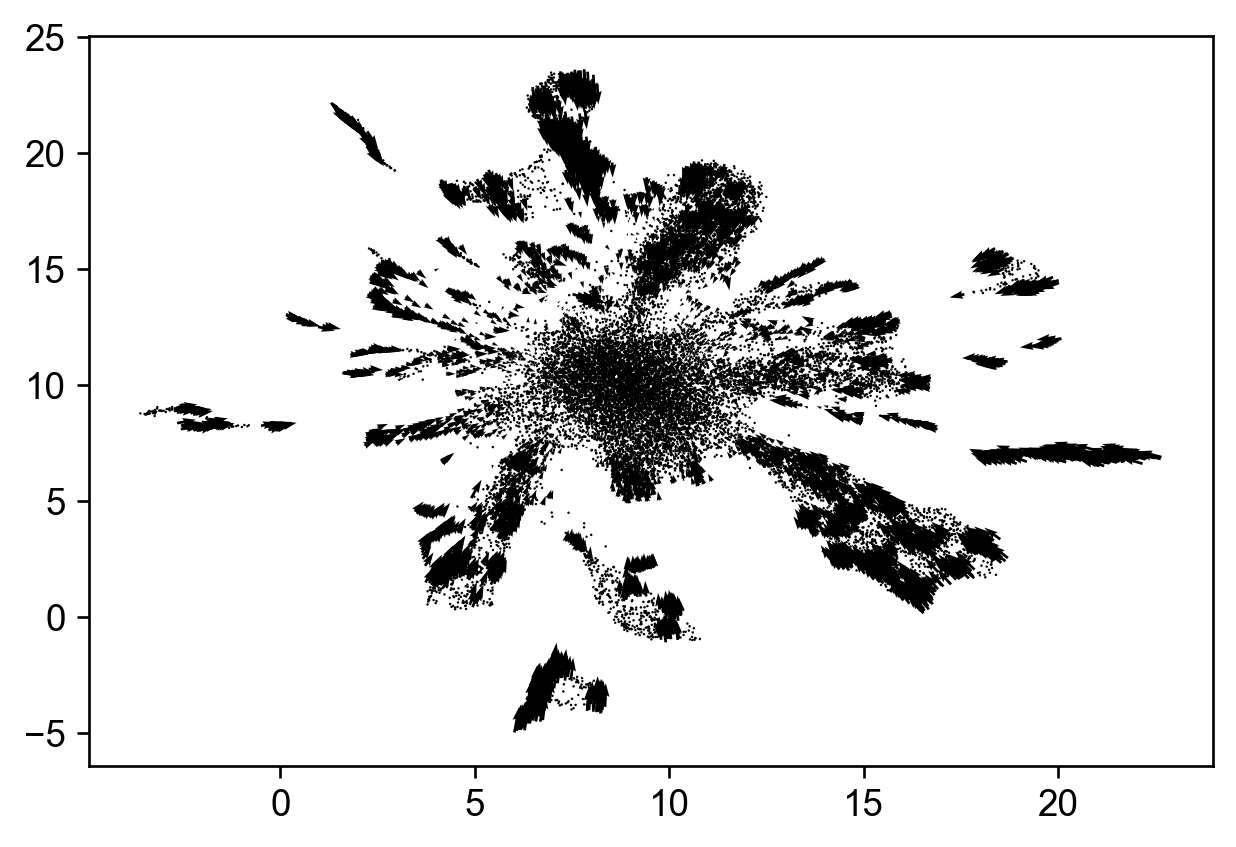

In [137]:
quiver(adata.obsm['X_umap'][:, 0], adata.obsm['X_umap'][:, 1], 
       V_emb[:, 0], V_emb[:, 1])

In [99]:
sdata = adata[cells13]
marginals = pd.DataFrame(sdata.obsm['CM_nsbm_level_0'], columns=sdata.obs['nsbm_level_0'].cat.categories)